100


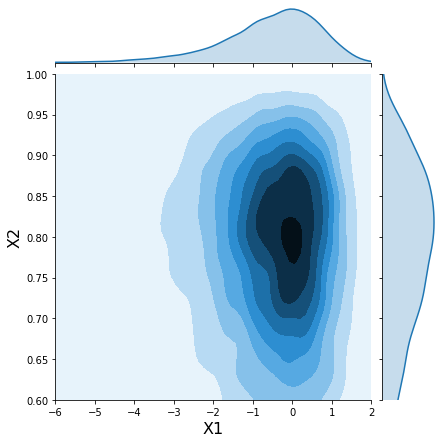

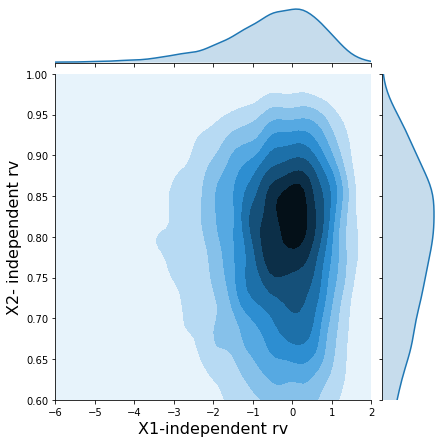

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns

# This program generates a Gaussian copula with a random correlation matrix to generate a N multivariate random variables
# each of whose marginals can be specified by any distribution. The output of this program would be a generation of samples 
# from the copula

# For a given R∈[−1,1]d×d, the Gaussian copula with parameter matrix R can be written as CGaussR(u)=ΦR(Φ−1(u1),…,Φ−1(ud)) 
#where Φ−1 is the inverse cumulative distribution function of a standard normal and ΦR is the joint cdf of a multivariate 
#normal distribution with mean vector zero and covariance matrix equal to the correlation matrix R.

#In the following code we went the opposite way to create samples from that distribution. The Gaussian copula as expressed 
# here takes uniform(0, 1) inputs, transforms them to be Gaussian, then applies the correlation and transforms them back to uniform.
# we use N =2 and plot the charts with the effects of using a copula vs using independent random variables. Modify code to 
# generate N>=2 as suited It will not happen by just changing value of N. you need to make sure that each column of the multivariate
# normal which is generated is assigned a marginal distribution of your choice.
##############################################################################################################################

np.random.seed(773) # remove this to create random samples in each run..this is to run a control experiment only

# INPUT- we need the number of variables with a given marginal distribution and correlation structure.
#**********************************************************************************************************************
N =100
high =200 # random number you can use anything you wish as the max random int to be generated
mean=np.zeros(N) # or you can provide mean = a N array with the expected values of the random variables.
v =np.ones(N) # or you can provide std =a N array with the std dev of of the random variables.( 1 is for std normal generation)
#***********************************************************************************************************************
eigsim = np.random.randint(high, size=(N,))
eigsim = N*eigsim/sum(eigsim)
x = stats.random_correlation.rvs((eigsim)) #random correlation generator
matmul= (np.dot(v[:,None],v[None,:]))
df_cov = np.multiply(matmul,x)
#print(df_cov)
mvnorm = stats.multivariate_normal(mean,df_cov )
# Generate random samples from multivariate normal with correlation randomly generated as shown by matrix 'x'


# In this part we are doing an example for a bivariate dstribution to show the impact of correlations First plt 
#shows the rv distributions with correlations The second simulates the bivariate rvs as independent rv samples.

x = mvnorm.rvs(10000)
print(len(x[2]))
x_unif = stats.norm.cdf(x) # Converting normal random variables into a uniform variable
gumbel = stats.gumbel_l()
beta = stats.beta(a=10,b=3)
h = sns.jointplot(gumbel.ppf(x_unif[:, 0]), beta.ppf(x_unif[:, 1]), kind='kde', xlim=(-6,2), ylim=(0.6,1.0),stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);
y = stats.multivariate_normal(np.zeros(N), np.eye(N)).rvs(10000) #generate samples from a standard normal variable
# with 0 mean 1 stddev and 0 correl
y_unif = stats.norm.cdf(y)
h = sns.jointplot(gumbel.ppf(y_unif[:, 0]), beta.ppf(y_unif[:, 1]), kind='kde', xlim=(-6, 2), ylim=(.6, 1.0),stat_func=None);
h.set_axis_labels('X1-independent rv', 'X2- independent rv',  fontsize=16);

In [2]:
# This code fits a given data stream into a artilcuar continuous distribution as provided in the libray of scipy stats module
#The data stream is provided a singular array and this module checks the best fit based on SSE wrt all other distributions in 
# the database. One can add their own criteria- AIC, BIC etc to determine best fit as required.

import numpy as np
import warnings
from scipy import stats
dist_continu = [d for d in dir(stats.stats.distributions) if isinstance(getattr(stats.stats.distributions, d), stats.stats.distributions.rv_continuous)]
#dist_discrete = [d for d in dir(stats.stats.distributions) if isinstance(getattr(stats.stats.distributions, d), stats.stats.distributions.rv_discrete)]
#print('number of continuous distributions: %d' % len(dist_continu))
#print('number of discrete distributions:   %d' % len(dist_discrete))
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    dist_continu = [d for d in dir(stats.stats.distributions) if isinstance(getattr(stats.stats.distributions, d), stats.stats.distributions.rv_continuous)]
    dist_discrete = [d for d in dir(stats.stats.distributions) if isinstance(getattr(stats.stats.distributions, d), stats.stats.distributions.rv_discrete)]
    best_distribution = stats.uniform
    best_params = (0.0, 1.0)
    best_sse = np.inf
    i=0
    for distribution in dist_continu: 
         # Try to fit the distribution
        
        if (str(distribution)) == 'levy_stable':
            continue
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                a = distribution
                # fit dist to data
                params = eval("stats."+ str(distribution)).fit(data)
                
                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = eval("stats."+ str(distribution)).pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                
                # identify if this distribution is better
                if best_sse > sse:
                    best_distribution = eval("stats."+ str(distribution))
                    best_params = params
                    best_sse = sse
                print(distribution, sse)
        except Exception as e:
            print(e)
            pass
        i+=1
    return (best_distribution.name, best_params)
data = np.random.rand(1175)
x,y =(best_fit_distribution(data, bins=200, ax=None))
print(x,y[-2],y[-1])

alpha 53.497839854103844
anglit 44.797344707193055
arcsine 84.74001379893664
argus 43.95324601991565
beta 28.907937395973374
betaprime 52.65359253895448
bradford 48.06135369342575
burr 30.206152736595833
burr12 50.35713371351109
cauchy 74.04828100346579
chi 48.58543831301794
chi2 52.8134077298105
cosine 48.51213970030728
crystalball 52.67652926666108
dgamma 60.089241360487634
dweibull 55.18748360168098
erlang 52.6809449093826
expon 81.10082921302978
exponnorm 52.67240530394554
exponpow 42.77250428647192
exponweib 30.08581203510313
f 52.65193999425861
fatiguelife 52.80184311944804
fisk 57.10403355817601
foldcauchy 58.03927471437887
foldnorm 41.63478158588543
frechet_l 50.13290678056466
frechet_r 50.3995280479579
gamma 52.680128378402635
gausshyper 28.657295033802068
genexpon 46.76716650770387
genextreme 50.13782168873064
gengamma 30.00436357578889
genhalflogistic 44.43431586607224
geninvgauss 52.71333253771596
genlogistic 56.35108013779582
gennorm 28.93802950552847
genpareto 58.06547258

In [4]:
# This piece of code reads a multi dimensional array from excel which has data of a multivariate distribution.
#The marginal distributions are assumed to have been already determined (using best fit or otherwise) and are provided 
#for the given data. This code then takes this data and creates a Gaussian copula and outputs the R∈[−1,1]d×d,which is needed 
# to further simuate samples using a copula. The samples generated can be used to test the goodness of fit for the multivariate
# data as required
import numpy as np
import math
import warnings
from scipy import stats
import pandas as pd
df = pd.read_excel('MultivariateData.xlsx', sheet_name='Sheet1') # enter the path or if it is in the same directory enter filename
data =df.to_numpy()
calc =np.zeros_like(data)
calc.reshape((len(data), len(df.columns)))
#print(data.shape)
#Assume the marginals are given or have been determined using best fit ( either the above code) or using a theoretical 
# basis that explains the natural process. We then assign each column to a marginal distribution below: We do an example 
#where we have 3 columns. One can expand this to as many columns by adding the data into Sheet1 of the excel file. You have
# to make sure you specify the marginals of every column you input below as shown.

dist ={}
dist[0] = stats.norm(20,10) # first column determined to be normally distributed with a mean of 20 and stdev 10
dist[1] = stats.expon(0,1/0.3) # second columns is specified as an exponential distributed rv with lambda = 0.3
dist[2] = stats.lognorm(0.5,0,math.exp(2)) # third is lognormally distributed with mean 2 and std dev 0.5


for i in range(len(df.columns)):
    for j in range(len(data)):
        calc[j][i] = 1-dist[i].sf(data[j][i]) # we have converted the marginals into a uniform RVs
correlS, pS =stats.spearmanr(calc) # correl is the correlations between the underlying cdf of the multivariate RVs which is the 
#R matrix for a Gaussian copula generator  is correlS
#***************************************************************************************************************************
# EXTRA STUFF TO CHECK which shows why doing a spearman is better than pearssons
#calculating the pearsons coefficient on the data 
correlationPdata = np.eye((len(df.columns)))
for i in range(len(df.columns)):
    for j in range(i+1):
        if(i==j):
            continue
        correlS2, pS2 = stats.pearsonr(data[:,i], data[:,j])
        correlationPdata[i][j]= correlS2
i_lower = np.tril_indices(len(df.columns), -1)
correlationPdata.T[i_lower] = correlationPdata[i_lower]
#print(calc)

#converting the uniform random variables frm the multivariate distributions to a standard normal random variable
normcalc= np.zeros_like(calc)
for i in range(len(df.columns)):
    for j in range(len(calc)):
        normcalc[j][i]= stats.norm.ppf(calc[j][i])
ct,ppp= stats.spearmanr(normcalc)
 # we see that the spearman coefficient is independent of the distributions as ct == correlS and only depends on rank

# calculating the pearsons coefficient on the cdf
correlationPcdf = np.eye((len(df.columns)))
for i in range(len(df.columns)):
    for j in range(i+1):
        if(i==j):
            continue
        correlS2, pS2 = stats.pearsonr(normcalc[:,i], normcalc[:,j])
        correlationPcdf[i][j]= correlS2
i_lower = np.tril_indices(len(df.columns), -1)
correlationPcdf.T[i_lower] = correlationPcdf[i_lower]
print(correlS,correlationPdata, correlationPcdf)

[[ 1.         -0.2688478   0.05168326]
 [-0.2688478   1.          0.04575628]
 [ 0.05168326  0.04575628  1.        ]] [[ 1.         -0.08145355  0.04891349]
 [-0.08145355  1.          0.05058345]
 [ 0.04891349  0.05058345  1.        ]] [[ 1.         -0.19200216  0.06992393]
 [-0.19200216  1.          0.01062693]
 [ 0.06992393  0.01062693  1.        ]]
